### Quantum Phase Estimation

In [2]:
# finding the phase of a T- gate

import matplotlib.pyplot as plt
import numpy as np
import math

from qiskit import IBMQ, Aer, transpile, assemble
from qiskit.visualization import plot_histogram

from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

set up the quantum circuit. We will use four qubits -- qubits 0 to 2 as counting qubits, and qubit 3 as the eigenstate of the unitary operator

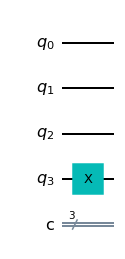

In [3]:
qpe = QuantumCircuit(4,3)
qpe.x(3)
qpe.draw('mpl')

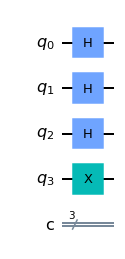

In [4]:
# applying hadamard to the counting qubits
for qubit in range(3):
    qpe.h(qubit)
qpe.draw('mpl')

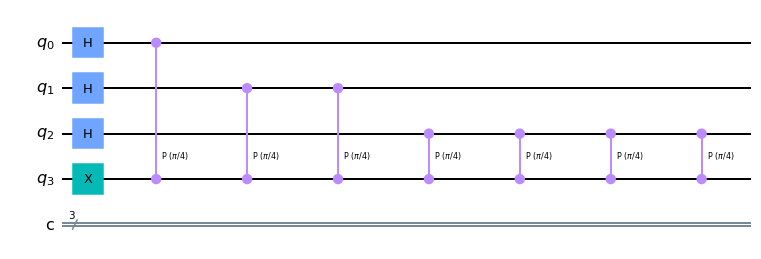

In [5]:
# next we apply the CROT
repetitions = 1
for counting_qubit in range(3):
    for i in range(repetitions):
        qpe.cp(math.pi/4, counting_qubit, 3)
    repetitions *= 2
qpe.draw('mpl')

In [6]:
# apply the inverse QFT

def qft_dagger(qc,n):
    for qubit in range(n//2):
        qc.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            qc.cp(-math.pi/float(2**(j-m)), m , j)
        qc.h(j)

In [7]:
qpe.barrier()
qft_dagger(qpe,3)
qpe.barrier()
for n in range(3):
    qpe.measure(n,n)

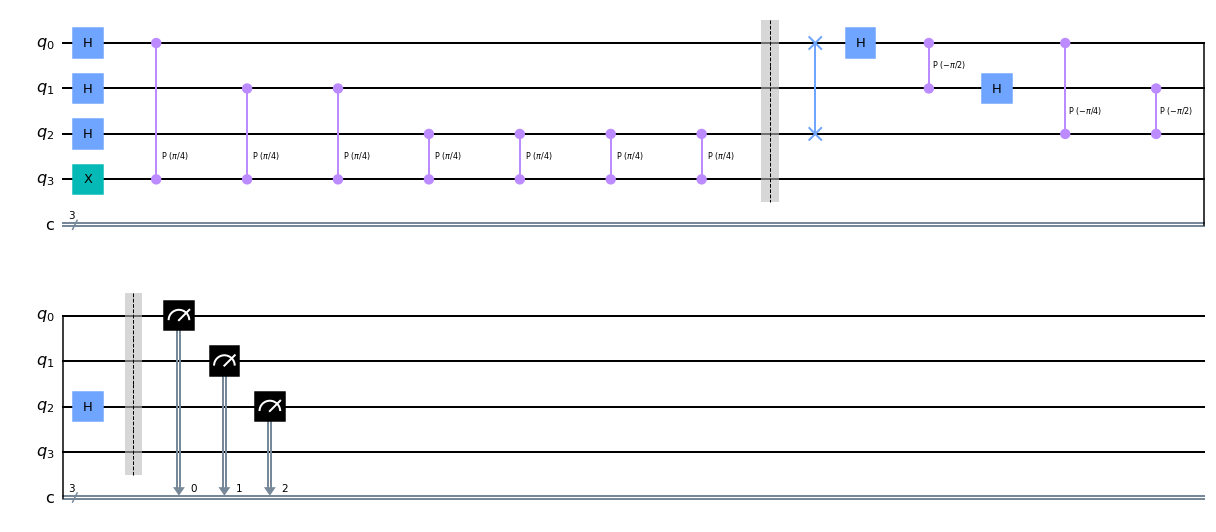

In [8]:
qpe.draw('mpl')

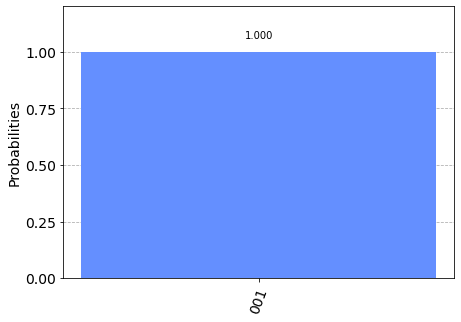

In [9]:
aer_sim = Aer.get_backend('aer_simulator')
shots = 2048
t_qpe = transpile(qpe, aer_sim)
qobj = assemble(t_qpe, shots=shots)
results = aer_sim.run(qobj).result()
answer = results.get_counts()

plot_histogram(answer)

We see we get one result (001) with certainty, which translates to the decimal: 1. We now need to divide our result by $2^n$  to get $\theta$
 :
$ \theta = \frac{1}{2^3} = \frac{1}{8} $
 
This is exactly the result we expected

### More Precision

Now Instead of T-gate we'll use a gate with $\theta = \frac{1}{5}$

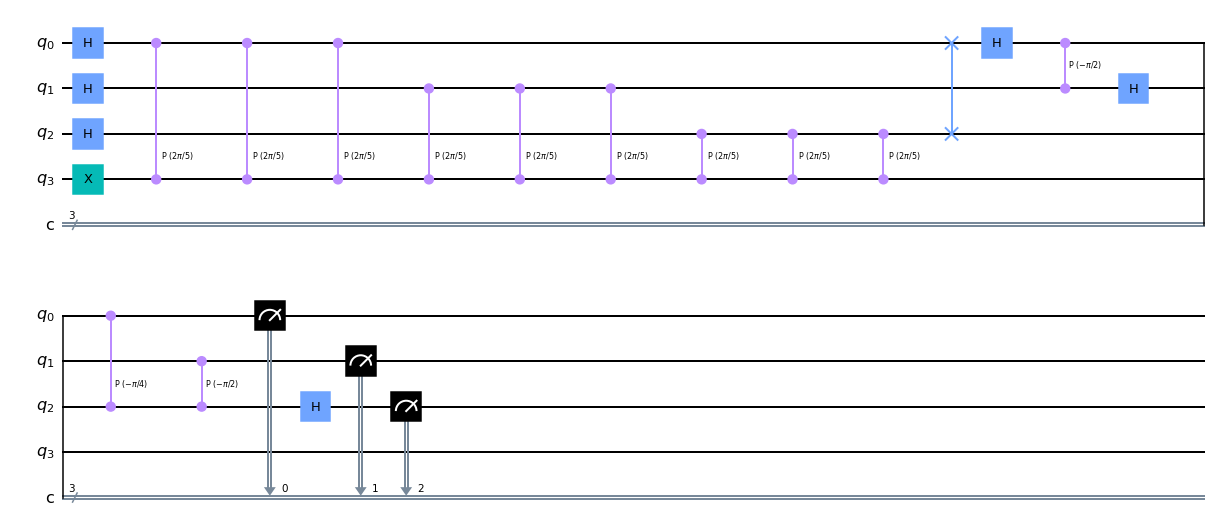

In [29]:
qpe2 = QuantumCircuit(4,3)

for qubit in range(3):
    qpe2.h(qubit)
    
# eigen state of psi
qpe2.x(3)


# doing the CU
angle = 2*math.pi/5
repetitions = 1
for counting_qubits in range(3):
    for i in range(3):
        qpe2.cp(angle, counting_qubits, 3)
    repetitions *= 2
    

# applying the inv qft
qft_dagger(qpe2, 3)

for n in range(3):
    qpe2.measure(n,n)
qpe2.draw('mpl')

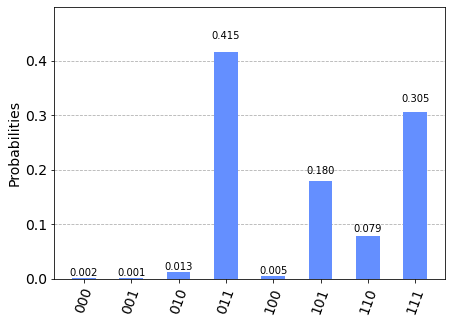

In [30]:
aer_sim = Aer.get_backend('aer_simulator')
shots = 4000
t_qpe2 = transpile(qpe2, aer_sim)
qobj = assemble(t_qpe2, shots = shots)
results = aer_sim.run(qobj).result()
answer = results.get_counts()

plot_histogram(answer)

We are expecting the result  $\theta = 0.2 $ , and we see our most likely results are 011(bin) = 3(dec) and 101(bin) = 5(dec) and 111(bin) = 7(dec).  The true value of  
$\theta$
  lies between the values we can get from our counting bits, and this gives us uncertainty and imprecision

To get more precision we simply add more counting qubits. We are going to add two more counting qubits:

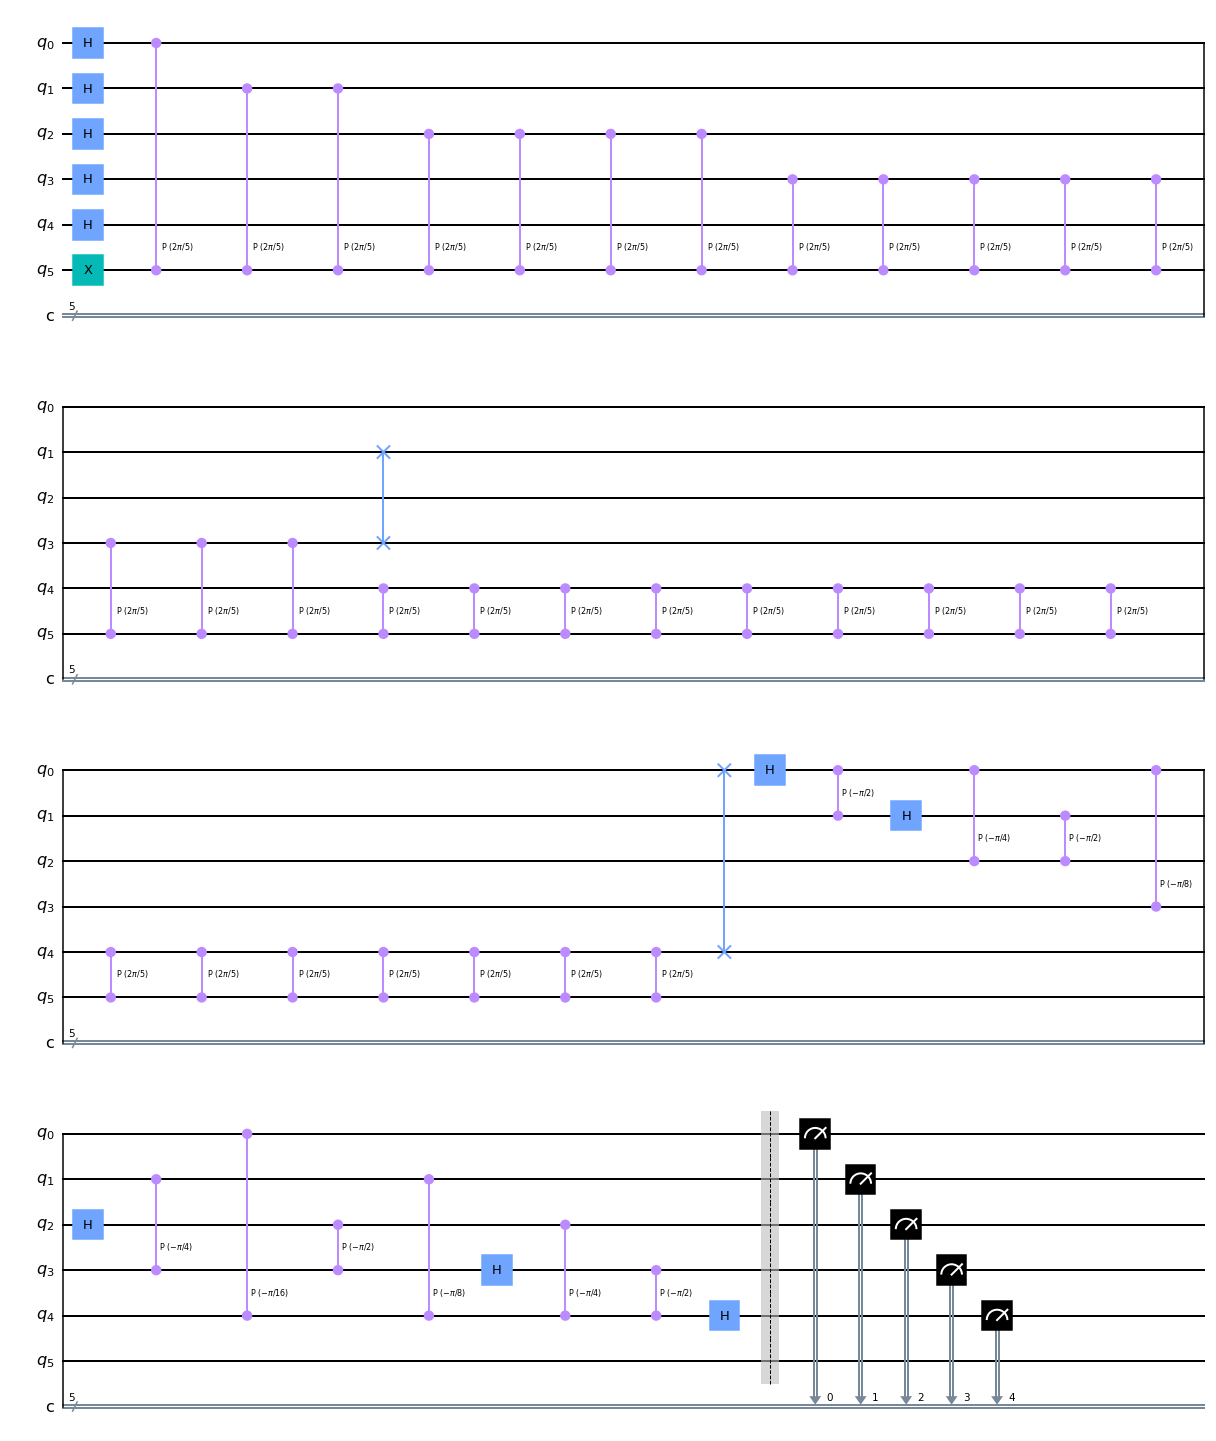

In [36]:
# add two more qubits for more precision

# Create and set up circuit
qpe3 = QuantumCircuit(6, 5)

# Apply H-Gates to counting qubits:
for qubit in range(5):
    qpe3.h(qubit)

# Prepare our eigenstate |psi>:
qpe3.x(5)

# Do the controlled-U operations:
angle = 2*math.pi/5
repetitions = 1
for counting_qubit in range(5):
    for i in range(repetitions):
        qpe3.cp(angle, counting_qubit, 5);
    repetitions *= 2

# Do the inverse QFT:
qft_dagger(qpe3, 5)

# Measure of course!
qpe3.barrier()
for n in range(5):
    qpe3.measure(n,n)

qpe3.draw('mpl')

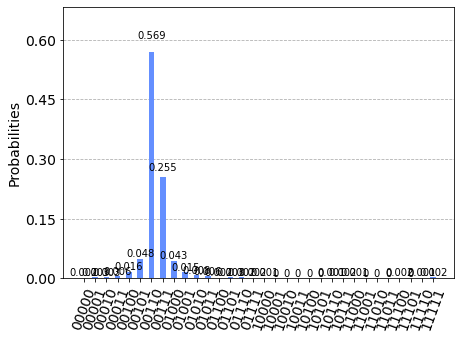

In [37]:
# Let's see the results!
aer_sim = Aer.get_backend('aer_simulator')
shots = 4096
t_qpe3 = transpile(qpe3, aer_sim)
qobj = assemble(t_qpe3, shots=shots)
results = aer_sim.run(qobj).result()
answer = results.get_counts()

plot_histogram(answer)

The two most likely measurements are now 00110 (decimal 6) and 00111 (decimal 7). Measuring these results would tell us  
$\theta$
  is:

$\theta = \frac{6}{2^5} = 0.18$
and 
$\theta = \frac{7}{2^5} = 0.22$

Hence, A much better precision!

### Running on real Quantum Device

In [39]:
from qiskit.providers.ibmq import least_busy

In [ ]:
IBMQ.load_account()
from qiskit.tools.monitor import job_monitor
provider = IBMQ.get_provider(hub='ibm-q')
backend = provider.get_backend('ibmq_manila')

# Run with 2048 shots
shots = 2048
t_qpe = transpile(qpe, backend, optimization_level=3)
job = backend.run(t_qpe, shots=shots)
job_monitor(job)

In [45]:
%matplotlib inline

from qiskit import *
from qiskit.visualization import *
from qiskit.tools.monitor import *
provider = IBMQ.load_account()
backend_overview()


ibmqfactory.load_account:WARNING:2021-07-31 00:12:46,834: Credentials are already in use. The existing account in the session will be replaced.


ibmq_manila                  ibmq_quito                   ibmq_belem
-----------                  ----------                   ----------
Num. Qubits:  5              Num. Qubits:  5              Num. Qubits:  5
Pending Jobs: 0              Pending Jobs: 0              Pending Jobs: 0
Least busy:   True           Least busy:   False          Least busy:   False
Operational:  True           Operational:  True           Operational:  True
Avg. T1:      171.1          Avg. T1:      87.3           Avg. T1:      92.8
Avg. T2:      63.1           Avg. T2:      71.7           Avg. T2:      101.7



ibmq_lima                    ibmq_bogota                  ibmq_santiago
---------                    -----------                  -------------
Num. Qubits:  5              Num. Qubits:  5              Num. Qubits:  5
Pending Jobs: 0              Pending Jobs: 0              Pending Jobs: 3
Least busy:   False          Least busy:   False          Least busy:   False
Operational:  True           Op

In [ ]:
# get the results from the computation
results = job.result()
answer = results.get_counts(qpe)

plot_histogram(answer)